In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('loan.csv')
df=df.dropna(axis=1,how='all')
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print(numeric_data.shape)
print(categorical_data.shape)


/Users/parisahojjatnia/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2260668, 106)
(2260668, 36)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
df.plot.scatter(x=['loan_amnt'],y=['annual_inc'])

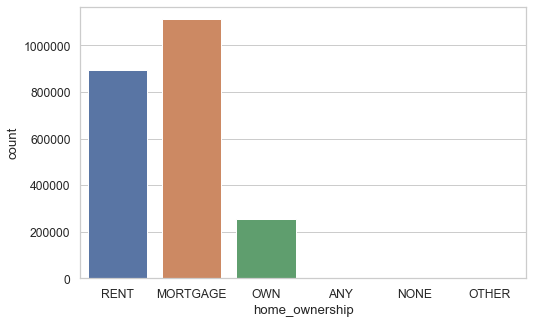

In [10]:
sns.countplot(df['home_ownership']);

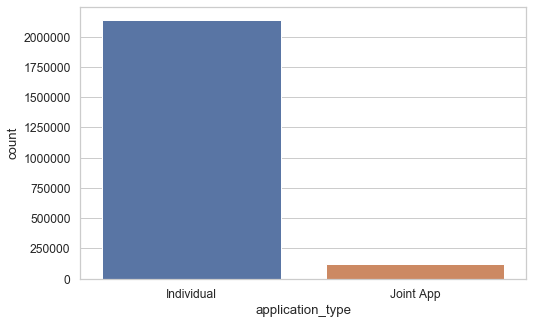

In [11]:
sns.countplot(df['application_type']);

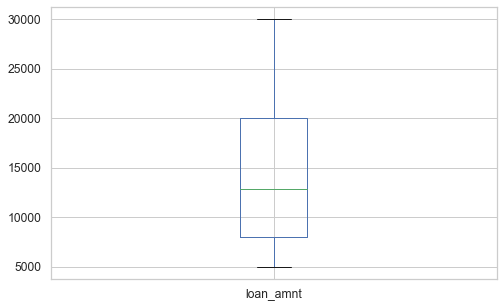

In [15]:
df['loan_amnt'].plot.box()

In [18]:
print(df['purpose'])

0          debt_consolidation
1          debt_consolidation
2          debt_consolidation
3          debt_consolidation
4          debt_consolidation
                  ...        
2260663    debt_consolidation
2260664    debt_consolidation
2260665    debt_consolidation
2260666    debt_consolidation
2260667           credit_card
Name: purpose, Length: 2260668, dtype: object


In [20]:
listn=df['purpose'].unique().tolist()
print(listn)


['debt_consolidation', 'credit_card', 'house', 'car', 'other', 'vacation', 'home_improvement', 'small_business', 'major_purchase', 'medical', 'renewable_energy', 'moving', 'wedding', 'educational']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

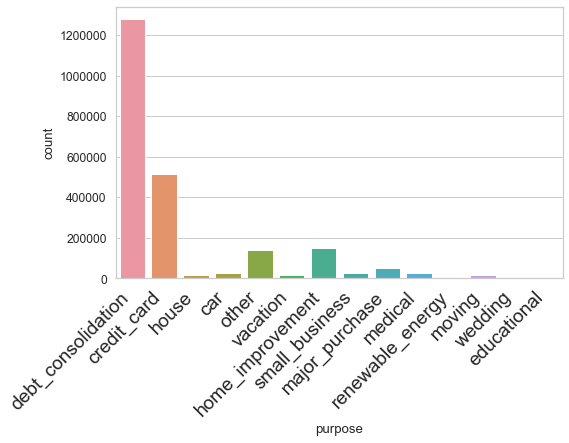

In [21]:
sns.countplot(df.purpose)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

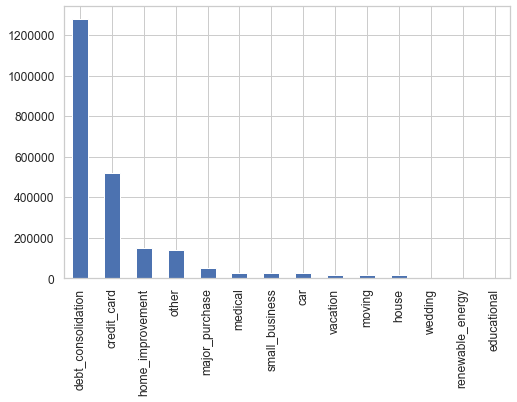

In [22]:
df['purpose'].value_counts().plot(kind='bar')




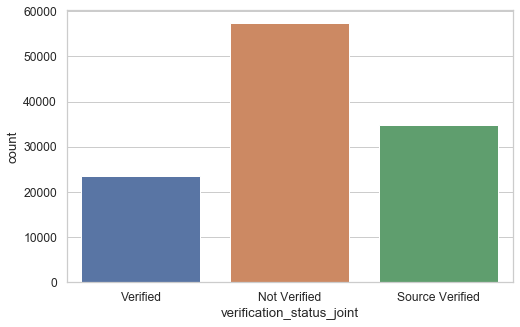

In [61]:
sns.countplot(df.verification_status_joint)


Text(0.5, 1.0, 'Amount Funded by the Lender')

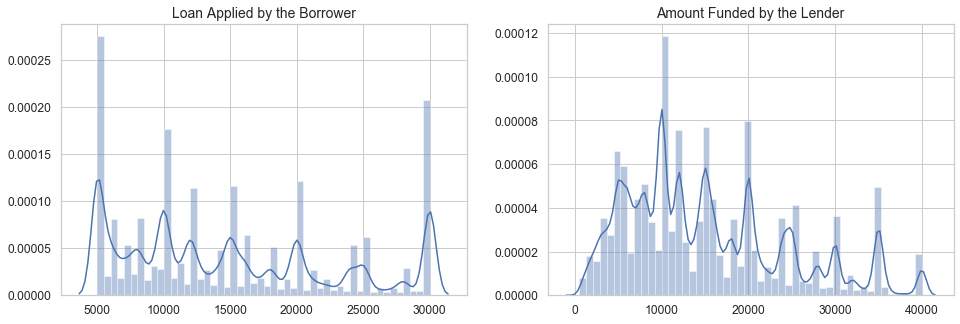

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values


sns.distplot(loan_amount, ax=ax[0])
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1])
ax[1].set_title("Amount Funded by the Lender", fontsize=14)

Mean loan amount is:  14809.203264256406


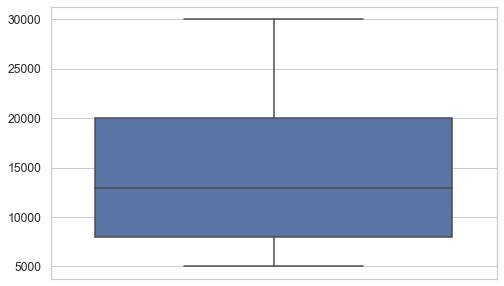

In [36]:
sns.boxplot(y=loan_amount)
print ("Mean loan amount is: ",loan_amount.mean())

Loan Statuses Counts


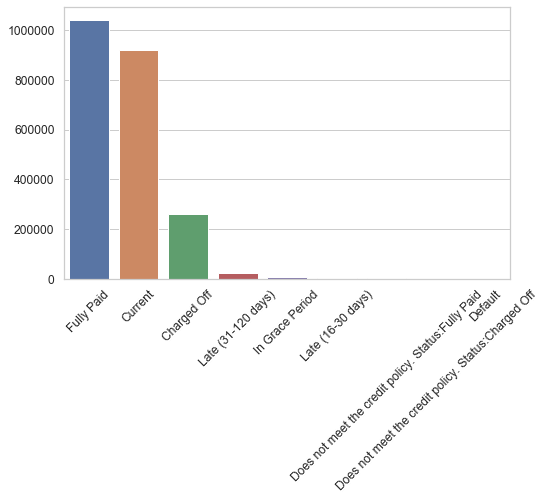

In [37]:
status_counts = df.loan_status.value_counts()
ax = sns.barplot(status_counts.index, status_counts.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
print("Loan Statuses Counts")


In [38]:
status_counts = df.loan_status.value_counts()

In [39]:
status_counts

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

Number of loans issued yearwise


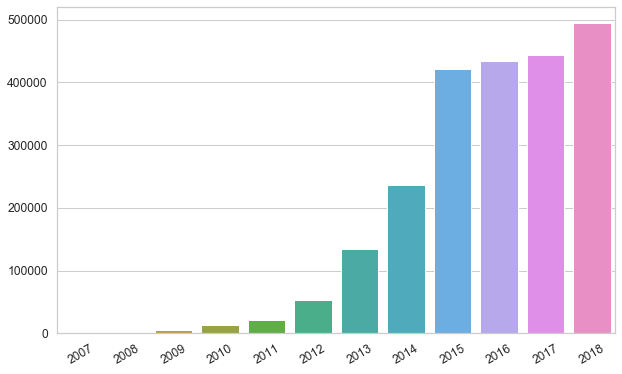

In [40]:
years = pd.to_datetime(df.issue_d)
df["year"] = years.dt.year
yearwise_loans = df.year.value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(yearwise_loans.index, yearwise_loans.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
print("Number of loans issued yearwise")



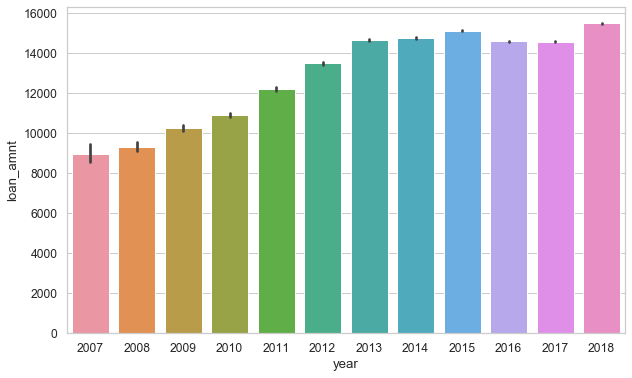

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(df.year, df.loan_amnt)


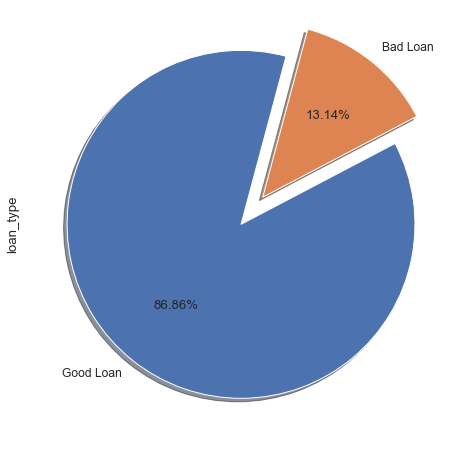

In [42]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
df['loan_type'] = np.nan

def loan_type(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
df['loan_type'] = df['loan_status'].apply(loan_type)

plt.figure(figsize=(8,8))
df.loan_type.value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', shadow = True, startangle = 75)

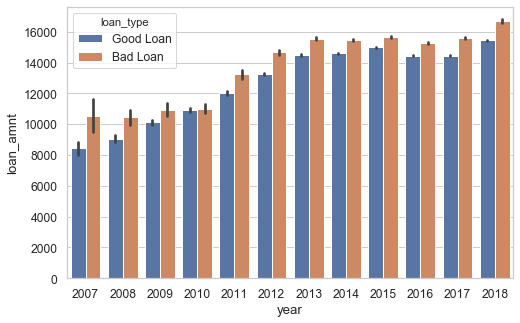

In [43]:
sns.barplot(x=df.year, y=df.loan_amnt, hue=df.loan_type)

<BarContainer object of 51 artists>

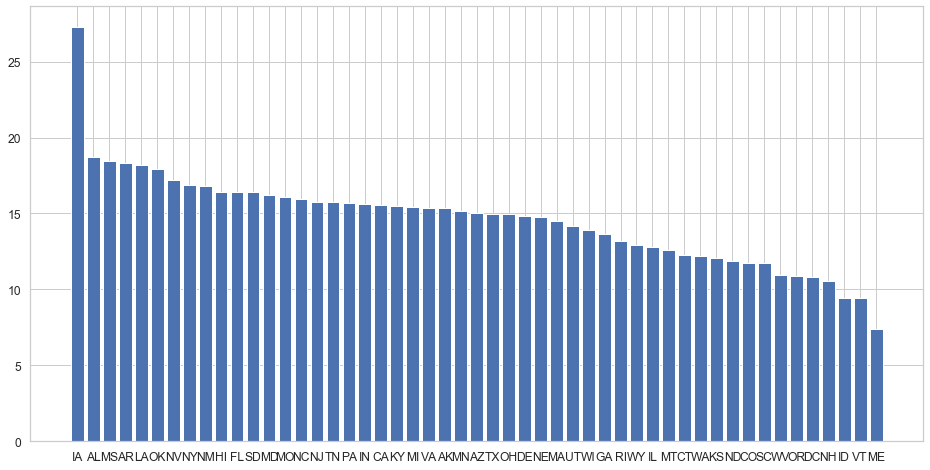

In [44]:
d = {}
for state in df['addr_state'].unique():
    values = df[df['addr_state']==state].loan_type.value_counts()
    d[state] = round(float(values[1])/float(values[0])*100,2)
    
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True) 
x, y = zip(*sorted_d) 

plt.figure(figsize=(16,8))
plt.bar(x,y)


LOANS ISSUED, GROUPED BY CREDIT SCORE


<Figure size 1440x504 with 0 Axes>

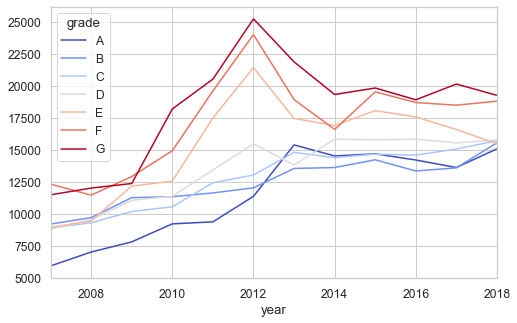

In [45]:
cmap = plt.cm.coolwarm
plt.figure(figsize=(20,7))

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(colormap=cmap)
print("LOANS ISSUED, GROUPED BY CREDIT SCORE")

INTEREST RATES GROUPED BY CREDIT SCORE


<Figure size 1440x720 with 0 Axes>

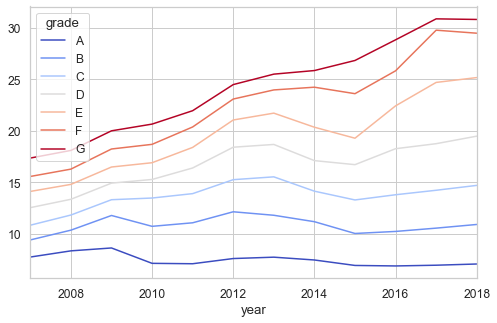

In [46]:
plt.figure(figsize=(20,10))
cmap = plt.cm.coolwarm

by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(colormap=cmap)
print("INTEREST RATES GROUPED BY CREDIT SCORE")

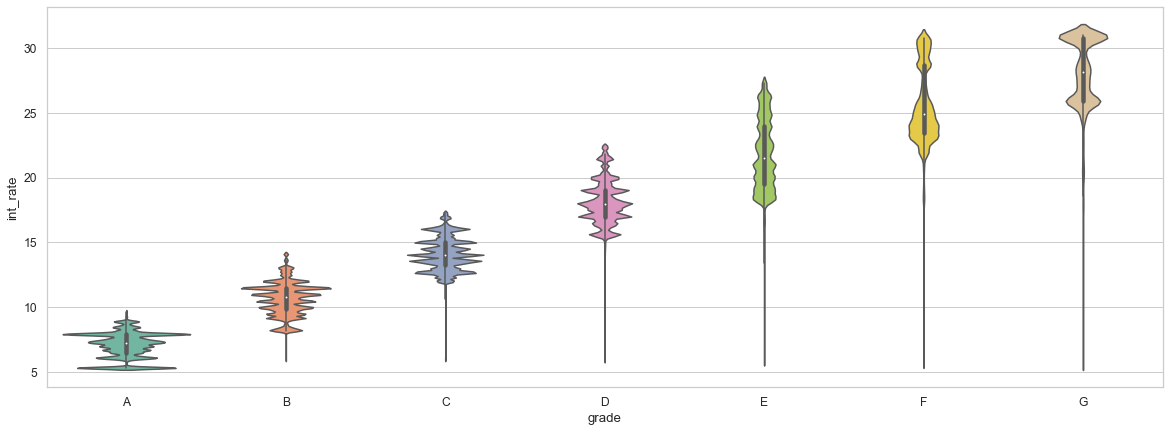

In [47]:
plt.figure(figsize=(20,7))
sns.violinplot(x='grade', y='int_rate', data=df, palette = "Set2", order=['A','B','C','D','E','F','G'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

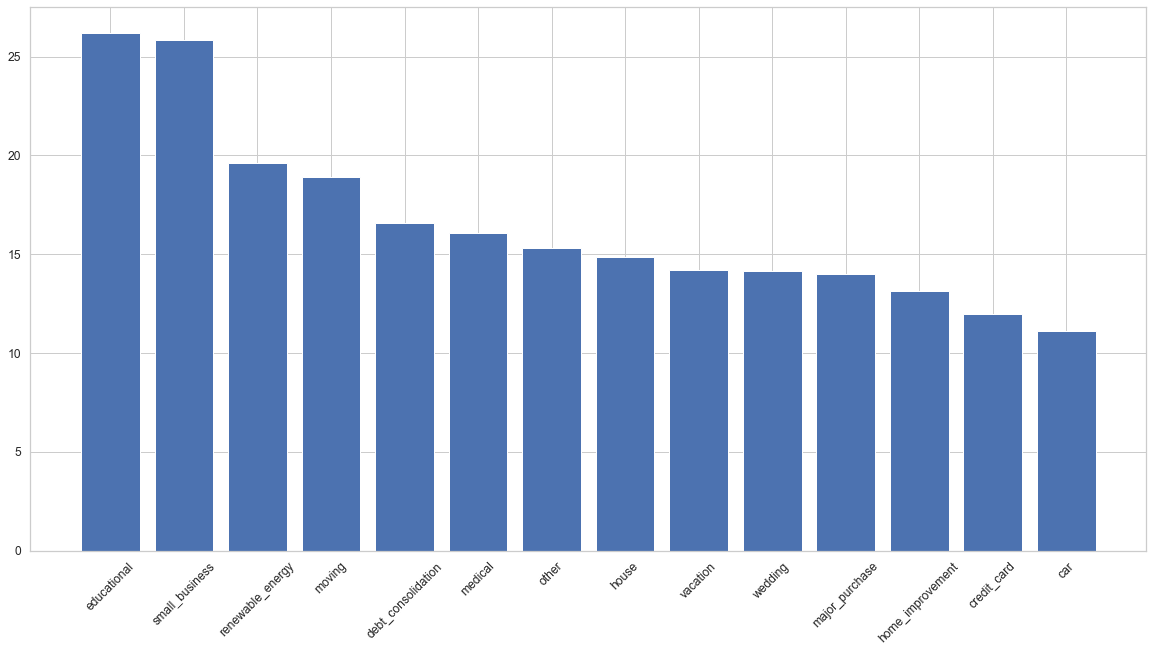

In [48]:
d = {}
for purpose in df.purpose.unique():
    values = df[df['purpose']==purpose].loan_type.value_counts()
    d[purpose] = round(float(values[1])/float(values[0])*100,2)

import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True) 
x, y = zip(*sorted_d)
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xticks(rotation=45)

In [49]:
df.grade.unique()


array(['C', 'D', 'B', 'A', 'E', 'F', 'G'], dtype=object)

In [50]:
df.sub_grade.unique()

array(['C1', 'D2', 'D1', 'C4', 'C3', 'C2', 'D5', 'B3', 'A4', 'B5', 'C5',
       'D4', 'E1', 'E4', 'B4', 'D3', 'A1', 'E5', 'B2', 'B1', 'A5', 'F5',
       'A3', 'E3', 'A2', 'E2', 'F4', 'G1', 'G2', 'F1', 'F2', 'F3', 'G4',
       'G3', 'G5'], dtype=object)

In [63]:
df.emp_title


0                    Chef
1             Postmaster 
2          Administrative
3           IT Supervisor
4                Mechanic
                ...      
2260663      house keeper
2260664     Skilled Labor
2260665           Teacher
2260666               NaN
2260667        BABYSITTER
Name: emp_title, Length: 2260668, dtype: object

Text(0.5, 1, 'Heatmap of Correlation Matrix')

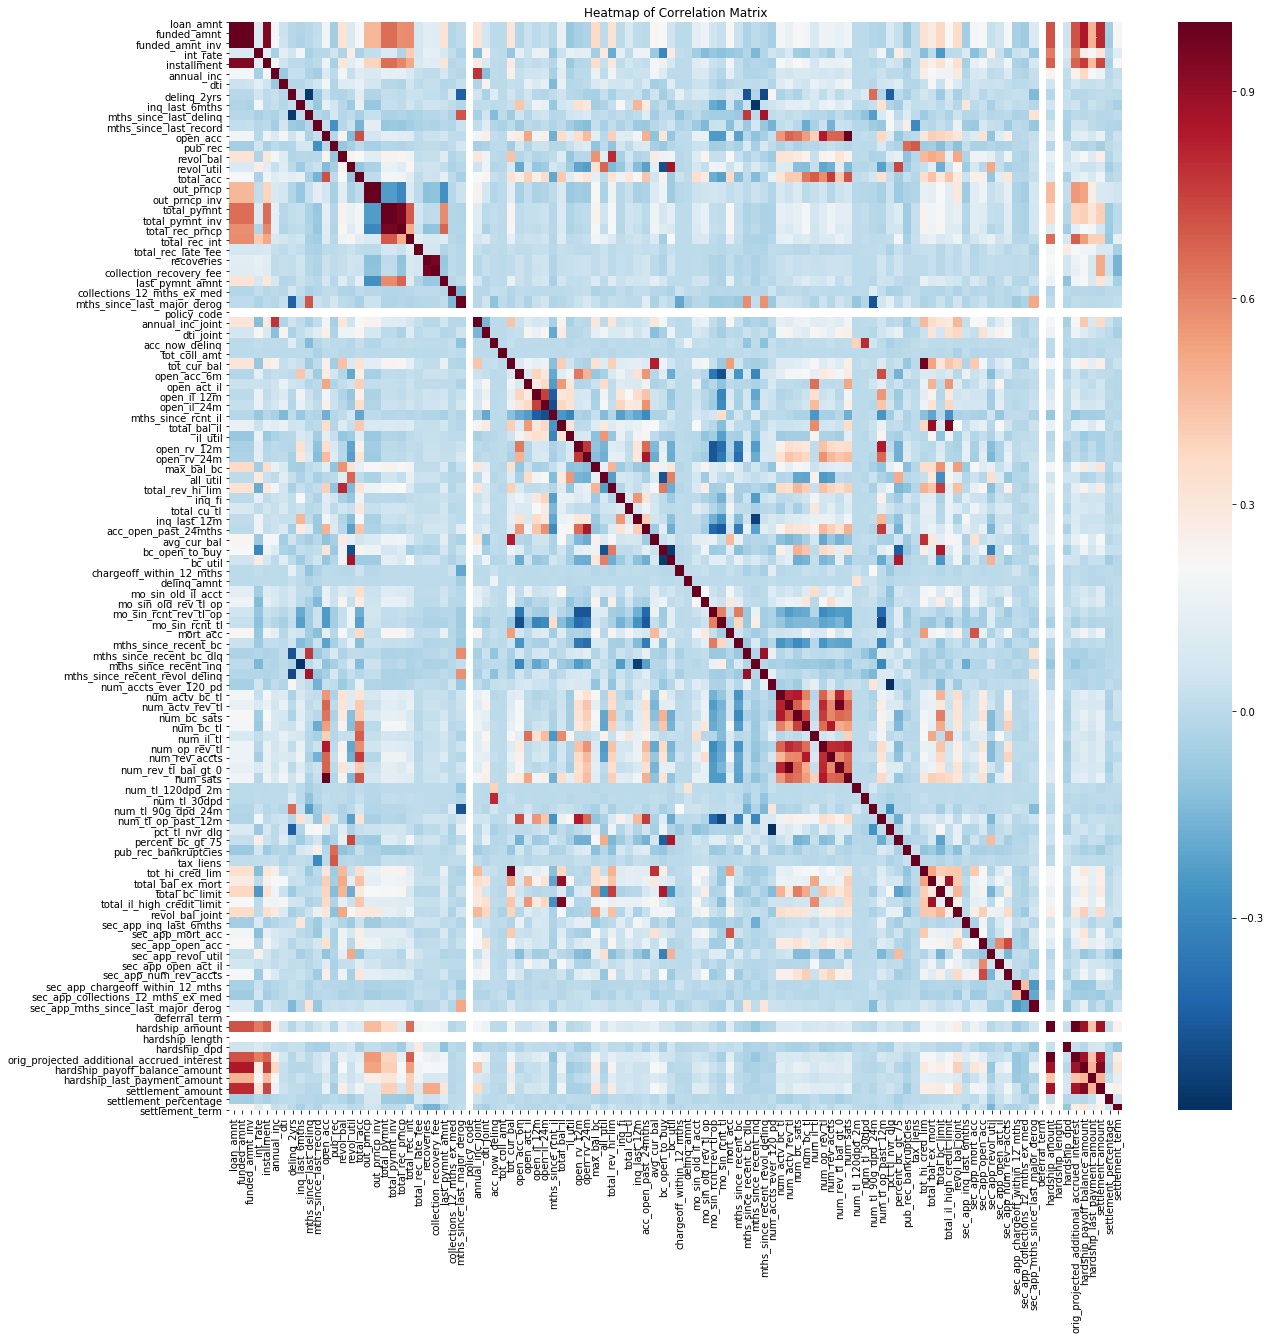

In [16]:
df2 = df.select_dtypes(include=[np.number])

plt.rcParams['figure.figsize'] = (20,20)
corr=df2.corr()
corr = (corr)
sns.set_palette("RdBu_r")
sns.heatmap(corr, cbar = True, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="RdBu_r").set_title('Heatmap of Correlation Matrix')

Text(0.5, 1.0, 'Amount Funded by the Lender')

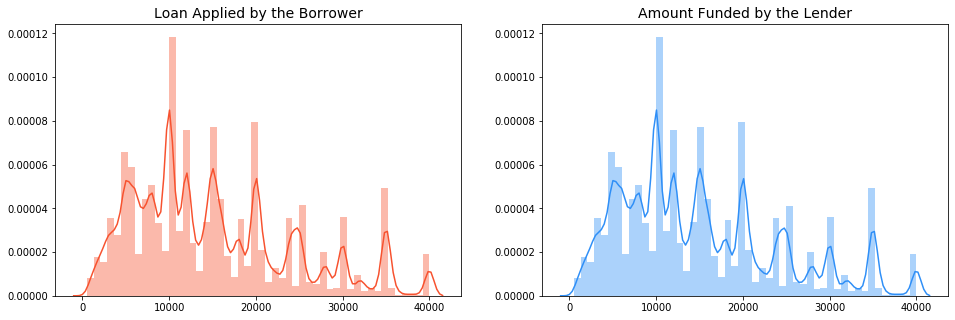

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))




loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values



sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)


Text(0, 0.5, 'Average loan amount issued')

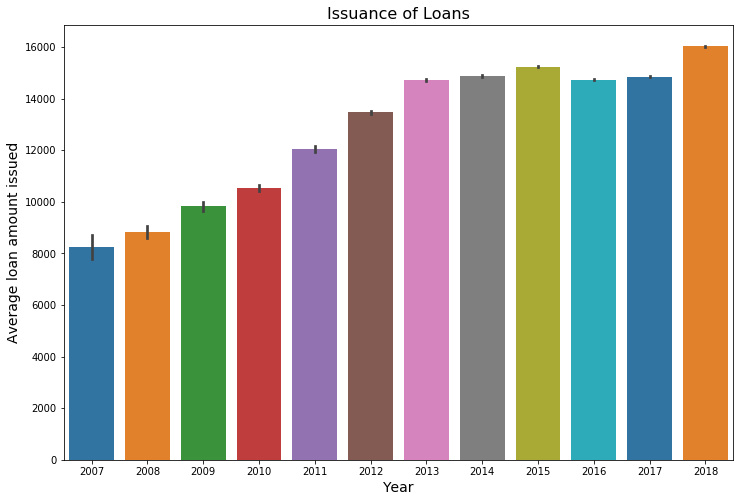

In [9]:
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

In [23]:
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)

In [14]:
df['complete_date'] = pd.to_datetime(df['issue_d'])

group_dates = df.groupby(['complete_date', 'region'], as_index=False).sum()

group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amnt'] = group_dates['loan_amnt']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amnt']])

Text(0.5, 1.0, 'Loans issued by Region')

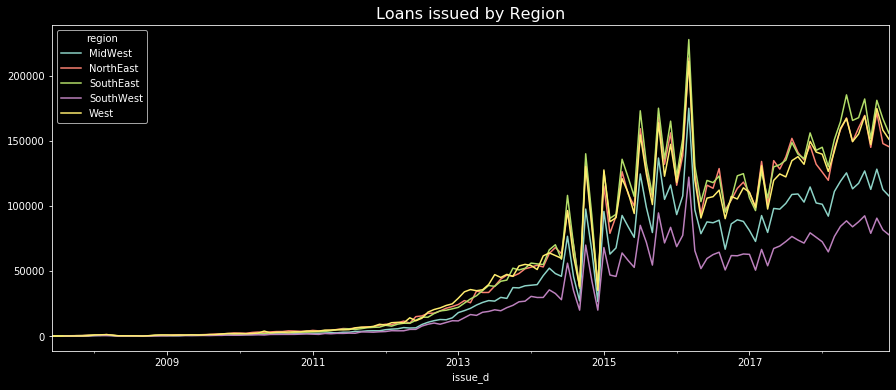

In [15]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amnt = df_dates.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amnt.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

In [16]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0
    

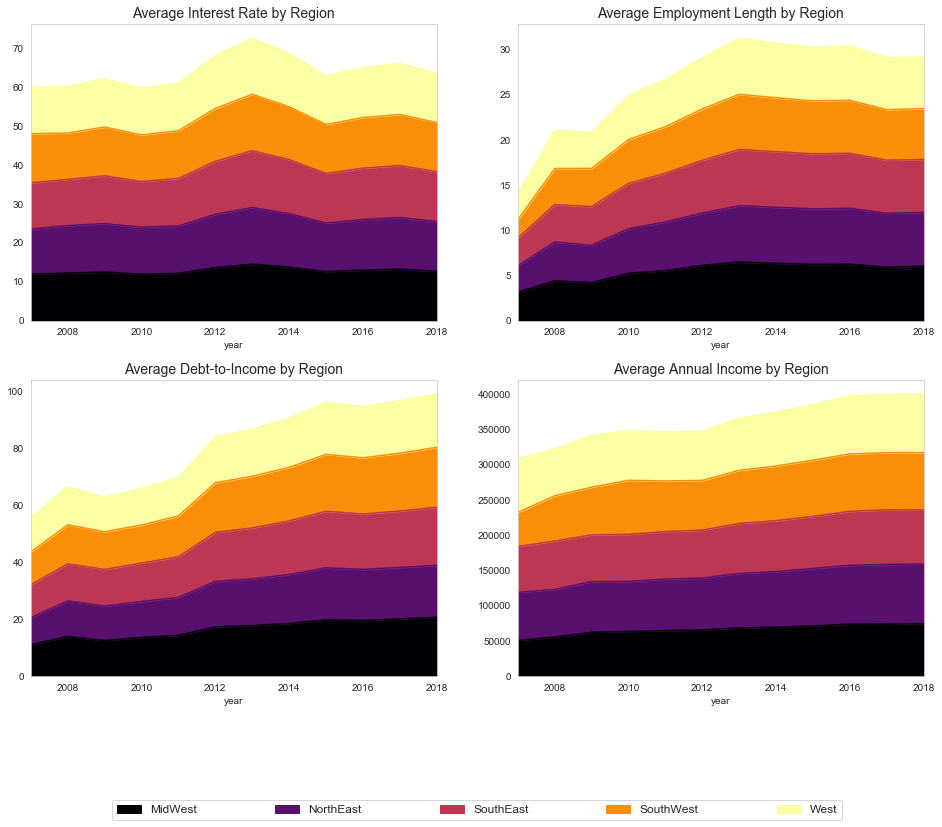

In [19]:
sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno

by_interest_rate = df.groupby(['year', 'region']).int_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = df.groupby(['year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)
# plt.xlabel('Year of Issuance', fontsize=14)

by_dti = df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = df.groupby(['year', 'region']).annual_inc.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

In [25]:
# We have 67429 loans categorized as bad loans

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
df['loan_type'] = np.nan

def loan_type(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
df['loan_type'] = df['loan_status'].apply(loan_type)
badloans_df = df.loc[df["loan_type"] == "Bad Loan"]
# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])


# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))


number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,,
MidWest,45202,9,142,1449,550,3609,50961
NorthEast,60827,7,190,2356,957,5356,69693
SouthEast,65460,5,184,2359,974,5596,74578
SouthWest,31833,4,79,1009,463,2794,36182
West,58333,6,166,1779,793,4542,65619


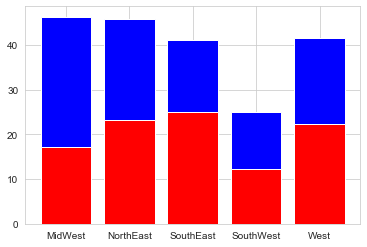

In [46]:

charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
not_meet_credit = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = loan_status_cross['In Grace Period'].values.tolist()
short_pay = loan_status_cross['Late (16-30 days)'] .values.tolist()
long_pay = loan_status_cross['Late (31-120 days)'].values.tolist()
x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West']


charged = plt.bar(x, charged_off, color='r')
 
defaults = plt.bar(x, default,color='b', bottom=charged_off)

#credit_policy = plt.bar(x, not_meet_credit, color='g', bottom=charged_off+defaults)

#grace=plt.bar(x, grace_period, color=(147, 147, 147), bottom=charged_off+defaults+credit_policy)

#short_pays=plt.bar(x, short_pay, color=(246, 157, 135), bottom=charged_off+defaults+credit_policy+grace)

#long_pays=plt.bar(x, long_pay, color=(238, 76, 73), bottom=charged_off+defaults+credit_policy+grace+short_pays)

plt.show()

In [47]:
import numpy as np
import matplotlib.pyplot as plt


charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
not_meet_credit = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = loan_status_cross['In Grace Period'].values.tolist()
short_pay = loan_status_cross['Late (16-30 days)'] .values.tolist()
long_pay = loan_status_cross['Late (31-120 days)'].values.tolist()
data = np.array(charged_off,default,not_meet_credit,grace_period,short_pay,long_pay)

color_list = ['b', 'g', 'r']

X = np.arange(data.shape[1])
for i in range(data.shape[0]):
  plt.bar(X, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

plt.show()

ValueError: only 2 non-keyword arguments accepted